# Boston Housing

## 1. Dataset

In [1]:
from tensorflow.keras.datasets import boston_housing

In [14]:
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

In [15]:
x_train.shape, y_train.shape

((404, 13), (404,))

In [16]:
# Sklearn
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)

In [17]:
x_train.shape, y_train.shape

((404, 13), (404,))

In [18]:
x_test.shape, y_test.shape

((102, 13), (102,))

## 2. Modelo

In [24]:
from keras import Sequential, layers
model = Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(13,)))
model.add(layers.Dense(32, activation='elu'))
model.add(layers.Dense(32, activation='elu'))
model.add(layers.Dense(1, activation='linear'))

In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 128)               1792      
                                                                 
 dense_2 (Dense)             (None, 32)                4128      
                                                                 
 dense_3 (Dense)             (None, 32)                1056      
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 7,009
Trainable params: 7,009
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.compile('adam','mean_squared_error',['mse','mae'])

## 3. Entrenamiento

In [36]:
history = model.fit(x_train, y_train, batch_size=32, epochs=60, validation_data=(x_test, y_test), verbose=0)

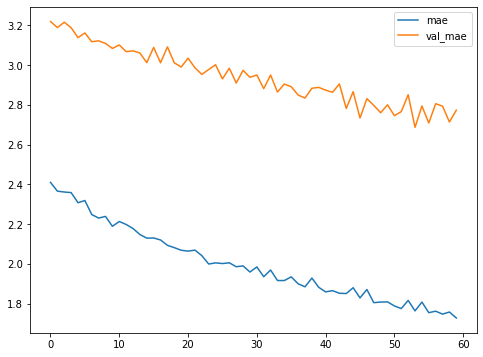

In [37]:
import pandas as pd
pd.DataFrame(history.history)[['mae','val_mae']].plot(figsize=(8,6))

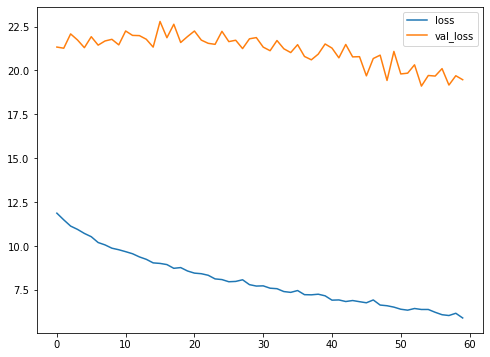

In [38]:
pd.DataFrame(history.history)[['loss','val_loss']].plot(figsize=(8,6))

## 4. Prediccion

In [34]:
x = x_test[:3]
y = y_test[:3]
x, y

(array([[ 1.55369355, -0.48361547,  1.0283258 , -0.25683275,  1.03838067,
          0.23545815,  1.11048828, -0.93976936,  1.67588577,  1.5652875 ,
          0.78447637, -3.48459553,  2.25092074],
        [-0.39242675, -0.48361547, -0.16087773, -0.25683275, -0.08840061,
         -0.49947436,  0.85606329, -0.68396235, -0.39603557,  0.15707841,
         -0.30759583,  0.42733126,  0.47880119],
        [-0.39982927, -0.48361547, -0.86940196, -0.25683275, -0.3615597 ,
         -0.39790979, -0.84607575,  0.52864277, -0.51114231, -1.094663  ,
          0.78447637,  0.44807713, -0.41415936]]), array([ 7.2, 18.8, 19. ]))

In [35]:
#model.predict(x.reshape(1,-1))
model.predict(x)

array([[ 7.6501765],
       [16.365274 ],
       [21.442167 ]], dtype=float32)